**Name:** Sancheet Kumar Baidya
    
**Stream:** MTech in Big Data Analytics
    
**Reg Num:** 22MCB0029
    
**Topic:** Community detection algorithms

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

**Dolphins Social Network Dataset**

An undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand. David Lusseau at al. The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations (2003)

In [7]:
G = nx.read_gml('dolphins.gml', label = 'id')

In [8]:
# print degree for node
for n, d in G.degree():
    print(f"{n:20} |{d:2}|")

                   0 | 6|
                   1 | 8|
                   2 | 4|
                   3 | 3|
                   4 | 1|
                   5 | 4|
                   6 | 6|
                   7 | 5|
                   8 | 6|
                   9 | 7|
                  10 | 5|
                  11 | 1|
                  12 | 1|
                  13 | 8|
                  14 |12|
                  15 | 7|
                  16 | 6|
                  17 | 9|
                  18 | 7|
                  19 | 4|
                  20 | 9|
                  21 | 6|
                  22 | 1|
                  23 | 3|
                  24 | 6|
                  25 | 3|
                  26 | 3|
                  27 | 5|
                  28 | 5|
                  29 | 9|
                  30 | 5|
                  31 | 1|
                  32 | 3|
                  33 |10|
                  34 | 5|
                  35 | 1|
                  36 | 7|
                  37 |11|
            

#### Clique Percolation Method

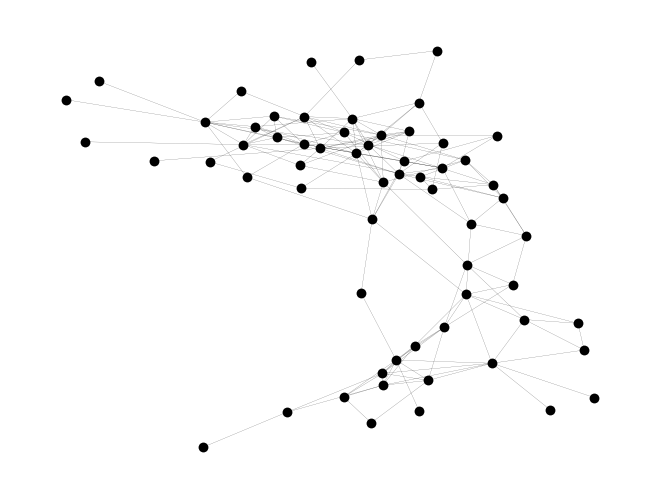

In [9]:
options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

In [10]:
list(nx.find_cliques(G))

[[1, 36],
 [1, 17, 27],
 [1, 54, 41],
 [1, 54, 19],
 [1, 26, 27],
 [1, 28],
 [2, 10, 42],
 [2, 44],
 [2, 61],
 [4, 51],
 [5, 56],
 [5, 9, 57, 13],
 [6, 56],
 [6, 13, 57, 9, 17],
 [6, 13, 57, 54],
 [7, 40],
 [7, 27],
 [7, 19, 54],
 [7, 19, 30],
 [8, 28, 20],
 [8, 3, 59],
 [8, 45, 59],
 [8, 45, 37],
 [9, 13, 32],
 [9, 13, 41, 57],
 [10, 0, 42, 47],
 [10, 29],
 [11, 51],
 [12, 33],
 [13, 54, 41, 57],
 [14, 0, 40],
 [14, 33, 50, 16],
 [14, 33, 37, 40],
 [14, 33, 37, 16],
 [14, 33, 37, 34],
 [14, 33, 37, 43],
 [14, 33, 38, 16],
 [14, 33, 38, 43],
 [14, 3],
 [14, 52, 40],
 [14, 52, 38],
 [14, 24],
 [15, 0, 40],
 [15, 45, 24, 18],
 [15, 45, 59],
 [15, 55],
 [17, 25, 27],
 [17, 31],
 [17, 22],
 [18, 20],
 [18, 45, 51, 29, 24],
 [18, 45, 51, 29, 21],
 [20, 36],
 [20, 38, 16],
 [20, 38, 44],
 [20, 47, 28],
 [20, 50, 16],
 [21, 33, 37],
 [21, 45, 37],
 [23, 51, 45],
 [23, 36],
 [25, 26, 27],
 [28, 47, 30],
 [29, 43],
 [29, 35],
 [29, 52],
 [30, 42, 47],
 [32, 60],
 [36, 59],
 [36, 37, 40],
 [36, 

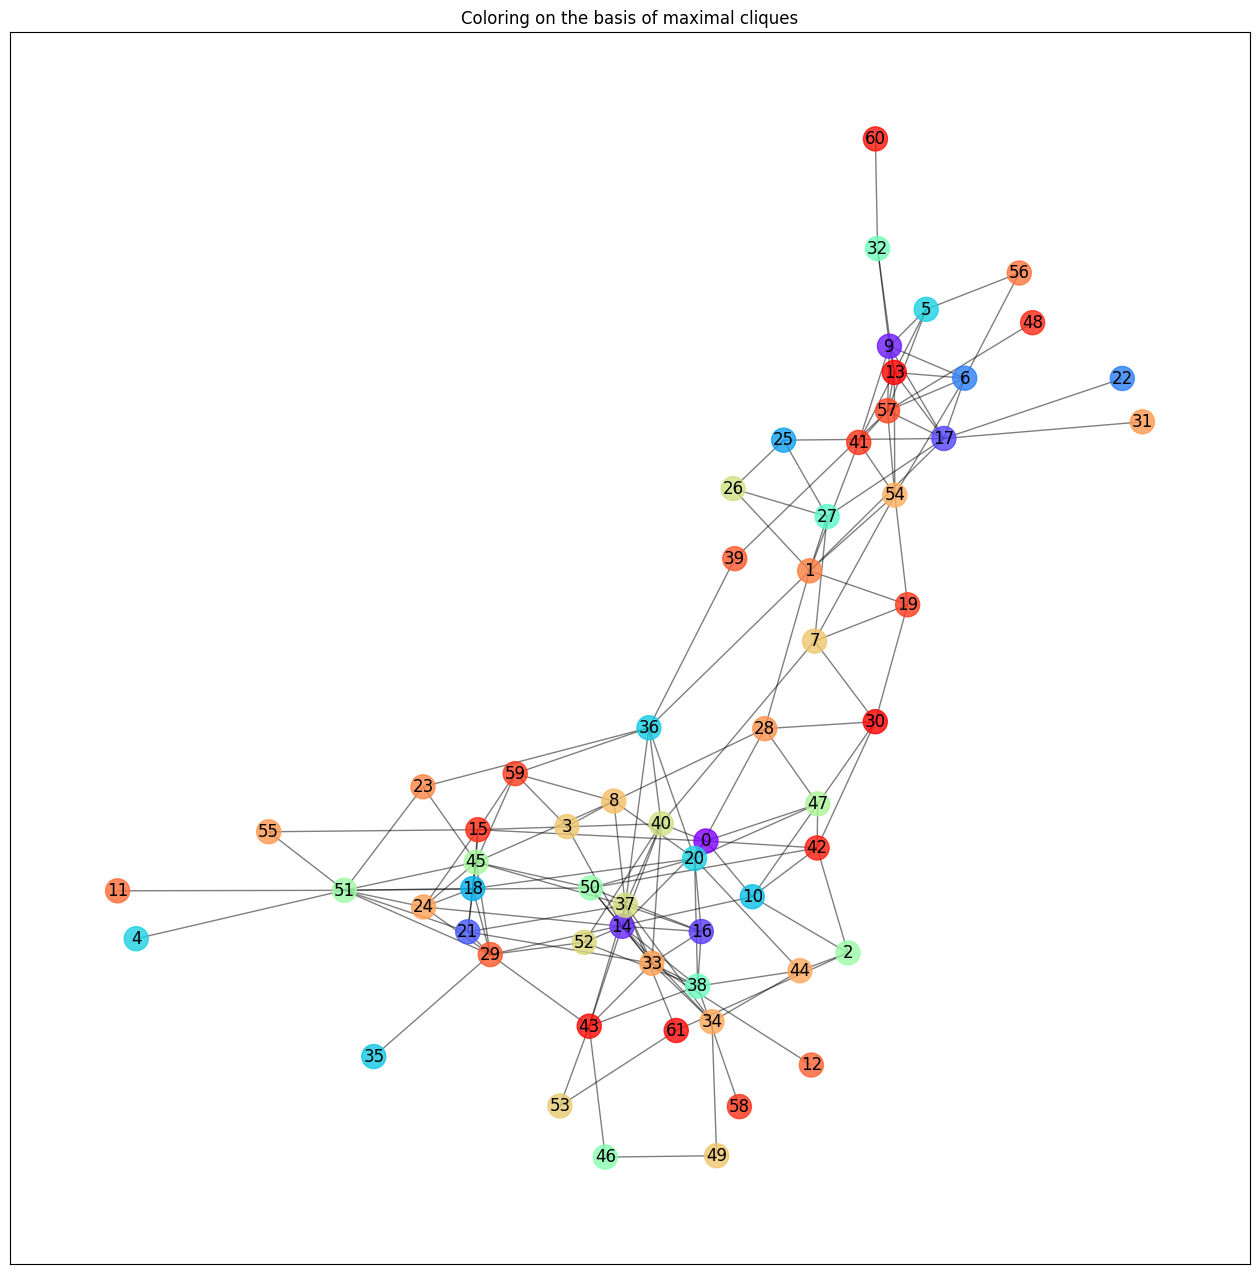

In [11]:
# Identify maximal cliques in the graph
maximal_cliques = list(nx.find_cliques(G))


# Create a dictionary to store the community colors
community_colors = {}

# Assign a different color to each community
for i, clique in enumerate(maximal_cliques):
    for node in clique:
        community_colors[node] = i

# Visualization
pos = nx.spring_layout(G)  # Positioning of nodes for visualization

# Draw the graph with community colors
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(G, pos, node_color=list(community_colors.values()), cmap='rainbow', alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title('Coloring on the basis of maximal cliques')
plt.show()

In [12]:
def find_communities_from_cliques(cliques, overlap_threshold):
    # Step 1: Build a clique graph
    clique_graph = nx.Graph()
    for i, clique1 in enumerate(cliques):
        for j, clique2 in enumerate(cliques):
            if i != j and len(set(clique1) & set(clique2)) >= overlap_threshold:
                clique_graph.add_edge(i, j)

    # Step 2: Find connected components
    communities = list(nx.connected_components(clique_graph))

    return communities

# Example usage
# Provide a list of cliques identified by the clique percolation method
cliques = list(nx.find_cliques(G))

# Set the overlap threshold
overlap_threshold = 2

# Find communities from cliques
communities = find_communities_from_cliques(cliques, overlap_threshold)

# Print the identified communities
for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")


Community 1: {1, 4, 61, 46}
Community 2: {2, 3, 11, 13, 14, 17, 18, 23, 24, 29}
Community 3: {66, 6, 19, 55, 25, 62}
Community 4: {20, 21, 22, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 50, 51, 53, 54, 56, 57, 58, 59, 69, 74}


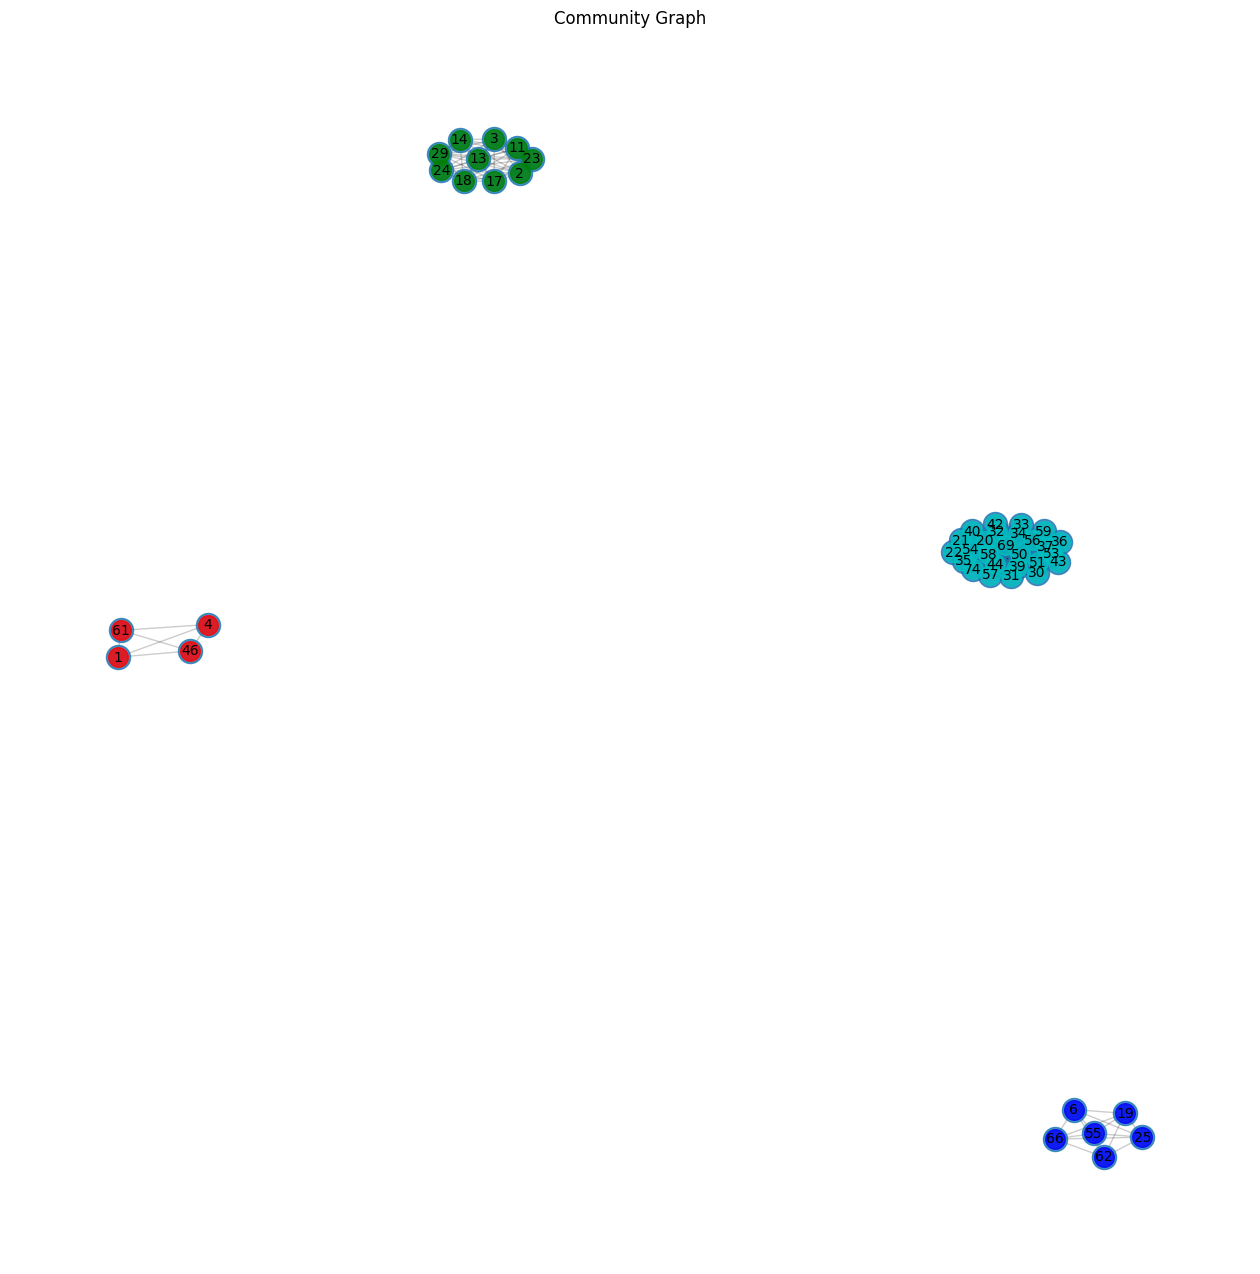

In [15]:
# Step 1: Create the community graph
community_graph = nx.Graph()

# Step 2: Define the communities
communities = [
    [1, 4, 61, 46],
    [2, 3, 11, 13, 14, 17, 18, 23, 24, 29],
    [66, 6, 19, 55, 25, 62],
    [20, 21, 22, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 50, 51, 53, 54, 56, 57, 58, 59, 69, 74]
]

# Step 3: Add nodes and edges to the community graph
for i, community in enumerate(communities, start=1):
    community_graph.add_nodes_from(community)
    community_graph.add_edges_from(nx.complete_graph(community).edges(), community=i)

# Step 4: Visualize the community graph
pos = nx.spring_layout(community_graph)

plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(community_graph, pos, node_size=300, alpha=0.8)
nx.draw_networkx_edges(community_graph, pos, alpha=0.2)

# Assign different colors to each community
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(community_graph, pos, nodelist=community, node_color=colors[i % len(colors)], node_size=200, alpha=0.8)

nx.draw_networkx_labels(community_graph, pos, font_size=10)

plt.title('Community Graph')
plt.axis('off')
plt.show()


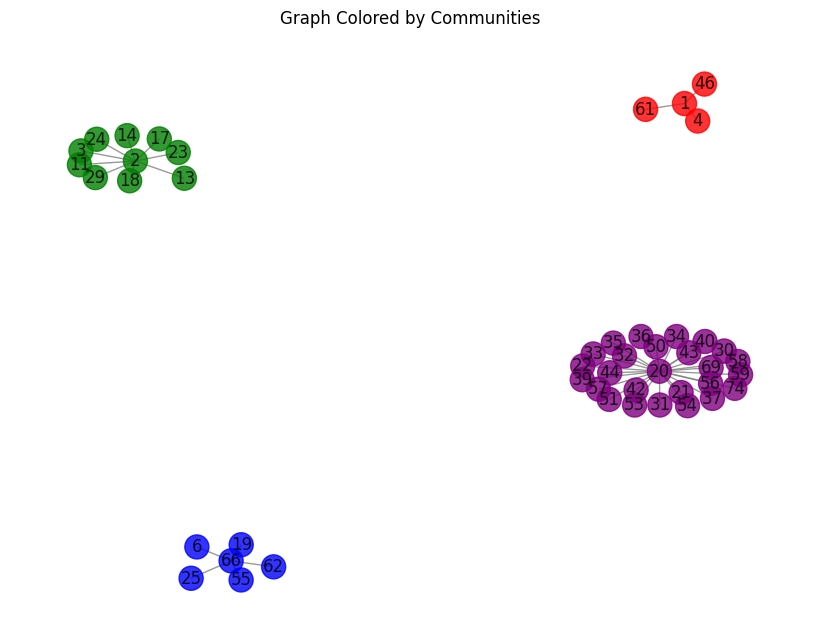

In [16]:
# Create an example graph using NetworkX
G = nx.Graph()
G.add_edges_from([(1,4),(1,61),(1,46), 
                  (2,3),(2,11), (2,13), (2,14), (2,17), (2,18), (2,23), (2,24), (2,29),
                 (66,6), (66,6),(66,19),(66,55),(66,25),(66,62),
                 (20,21),(20,22),(20,30),(20,31),(20,32),(20,33),(20,34),(20,34),(20,35),(20,36),(20,37),(20,39),(20,40),
                  (20,42),(20,43),(20,44),(20,50),(20,51),(20,53),(20,54),(20,56),(20,57),(20,58),(20,59),(20,69),(20,74)])

# Define the node categories dictionary
node_categories = {'category1':[1, 4, 61, 46],
                  'category2':[2, 3, 11, 13, 14, 17, 18, 23, 24, 29],
                  'category3':[66, 6, 19, 55, 25, 62],
                  'category4':[20, 21, 22, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 50, 51, 53, 54, 56, 57, 58, 59, 69, 74]}

# Define the node colors based on categories
node_colors = {node: 'red' if node in node_categories['category1'] else 'green' if node in node_categories['category2'] else 'blue' if node in node_categories['category3'] else 'purple' for node in G.nodes()}

# Visualization
pos = nx.spring_layout(G)  # Positioning of nodes for visualization

# Draw the graph with node colors
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()], edge_color='gray', node_size=300, alpha=0.8)
plt.title('Graph Colored by Communities')
plt.show()


#### Girvan-Newman Algorithm

[[0, 2, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 20, 21, 23, 24, 28, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 55, 58, 59, 61], [1, 5, 6, 7, 9, 13, 17, 19, 22, 25, 26, 27, 31, 32, 39, 41, 48, 54, 56, 57, 60]]


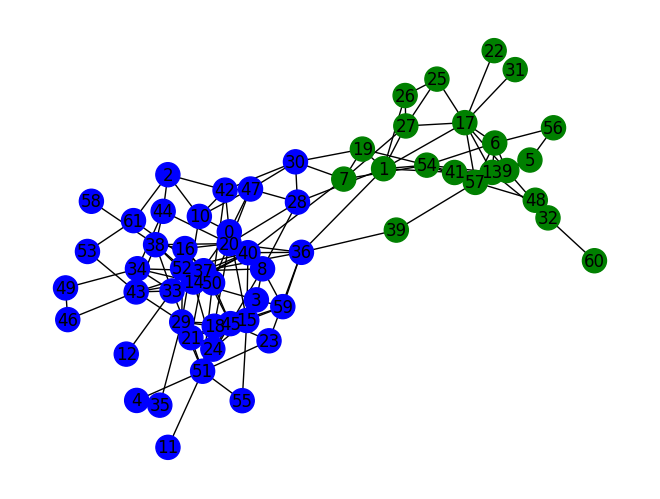

In [18]:
from networkx.algorithms.community.centrality import girvan_newman
G = nx.read_gml('dolphins.gml', label = 'id')
communities = girvan_newman(G)
node_groups = []
for com in next(communities):
    node_groups.append(list(com))
print(node_groups)
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

#### Fluid Communities Algorithm

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61}


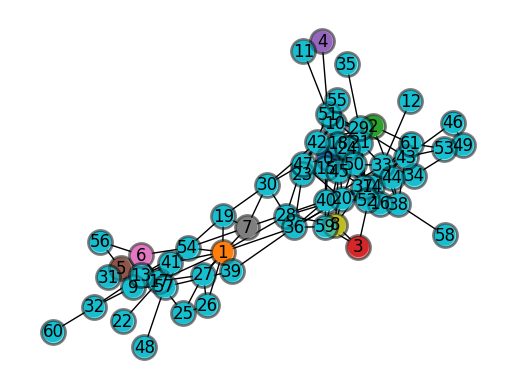

In [19]:
def fluid_communities(graph, threshold=0.5):
    # Initialize the initial community partition
    partition = {node: i for i, node in enumerate(graph.nodes())}

    # Iterate until no significant changes occur
    while True:
        # Step 1: Compute the modularity gain for each node
        modularity_gain = compute_modularity_gain(graph, partition)

        # Step 2: Find the node with maximum modularity gain
        max_gain_node = max(modularity_gain, key=modularity_gain.get)
        max_gain = modularity_gain[max_gain_node]

        # Step 3: Check if the maximum gain is above the threshold
        if max_gain <= threshold:
            break

        # Step 4: Move the node to the neighboring community with maximum gain
        move_node(graph, partition, max_gain_node)

    return partition


def compute_modularity_gain(graph, partition):
    modularity_gain = {}
    m = graph.number_of_edges()

    for node in graph.nodes():
        current_community = partition[node]
        node_degree = graph.degree[node]

        # Calculate the change in modularity for moving the node to each neighboring community
        for neighbor in graph.neighbors(node):
            neighbor_community = partition[neighbor]

            delta_modularity = (
                get_modularity(graph, partition, neighbor_community, node)
                - get_modularity(graph, partition, current_community, node)
            )

            # Calculate the modularity gain normalized by the node degree
            modularity_gain[neighbor] = delta_modularity / (2 * m * node_degree)

    return modularity_gain


def move_node(graph, partition, node):
    current_community = partition[node]
    max_gain = 0
    best_community = current_community

    # Find the neighboring community with maximum gain
    for neighbor in graph.neighbors(node):
        neighbor_community = partition[neighbor]

        delta_modularity = (
            get_modularity(graph, partition, neighbor_community, node)
            - get_modularity(graph, partition, current_community, node)
        )

        if delta_modularity > max_gain:
            max_gain = delta_modularity
            best_community = neighbor_community

    # Move the node to the community with maximum gain
    partition[node] = best_community


def get_modularity(graph, partition, community, node):
    in_degree = sum(graph.degree[node] for node in graph.neighbors(node) if partition[node] == community)
    tot_degree = sum(graph.degree[node] for node in graph.nodes() if partition[node] == community)
    m = graph.number_of_edges()

    return (in_degree / (2 * m)) - ((tot_degree / (2 * m)) ** 2)

def draw_communities(graph, partition):
    pos = nx.spring_layout(graph)
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i) for i in range(len(set(partition.values())))]

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, node_color=colors, node_size=200)

    # Draw edges
    nx.draw_networkx_edges(graph, pos)

    # Draw node labels
    nx.draw_networkx_labels(graph, pos)

    # Draw community boundaries
    node_communities = set(partition.values())
    for community in node_communities:
        community_nodes = [node for node in graph.nodes() if partition[node] == community]
        nx.draw_networkx_nodes(
            graph,
            pos,
            nodelist=community_nodes,
            node_color=colors[community],
            node_size=300,
            alpha=0.5,
            linewidths=2,
            edgecolors='black',
        )

    plt.axis('off')
    plt.show()


# Example usage

partition = fluid_communities(G)
print(partition)
draw_communities(G, partition)